

## 기본 패키지 및 데이터 정보 로드


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import missingno # 널값 바차트로 시각화

In [2]:
netflix = pd.read_csv('../use_df.csv')

In [3]:
netflix.head(1)

,Unnamed: 0,Title,Series or Movie,COUNTRY,Release Date,GENRE,VALUE,Genre_all,Tags,Languages,...,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Netflix Release Date,Production House,Summary,IMDb Votes
0,0,thequeensgambit,TV,United States,2020-10-23,Drama,44867,"Biography, Drama, History","TV Dramas,US TV Shows,TV Shows Based on Books,...","English, German, French",...,7.3,96.0,91.0,96.0,97.0,"$56,441,711",2020-10-23,"Pathé Pictures, Scott Rudin Productions","In a 1950s orphanage, a young girl reveals an ...",104495.0


In [4]:
netflix.columns

Index(['Unnamed: 0', 'Title', 'Series or Movie', 'COUNTRY', 'Release Date',
       'GENRE', 'VALUE', 'Genre_all', 'Tags', 'Languages', 'Hidden Gem Score',
       'Country Availability', 'Runtime', 'Director', 'Writer', 'Actors',
       'View Rating', 'IMDb Score', 'Rotten Tomatoes Score',
       'Metacritic Score', 'Awards Received', 'Awards Nominated For',
       'Boxoffice', 'Netflix Release Date', 'Production House', 'Summary',
       'IMDb Votes'],
      dtype='object')

In [5]:
df_net = netflix.drop(columns = ['Unnamed: 0'],axis =1)

In [6]:
df_net.isnull().sum()

Title                       0
Series or Movie             0
COUNTRY                   209
Release Date               65
GENRE                     377
VALUE                       0
Genre_all                 124
Tags                        9
Languages                 157
Hidden Gem Score          159
Country Availability        5
Runtime                     0
Director                  721
Writer                    523
Actors                    146
View Rating               723
IMDb Score                159
Rotten Tomatoes Score    1401
Metacritic Score         1528
Awards Received          1502
Awards Nominated For     1104
Boxoffice                1682
Netflix Release Date        0
Production House         1508
Summary                     2
IMDb Votes                159
dtype: int64

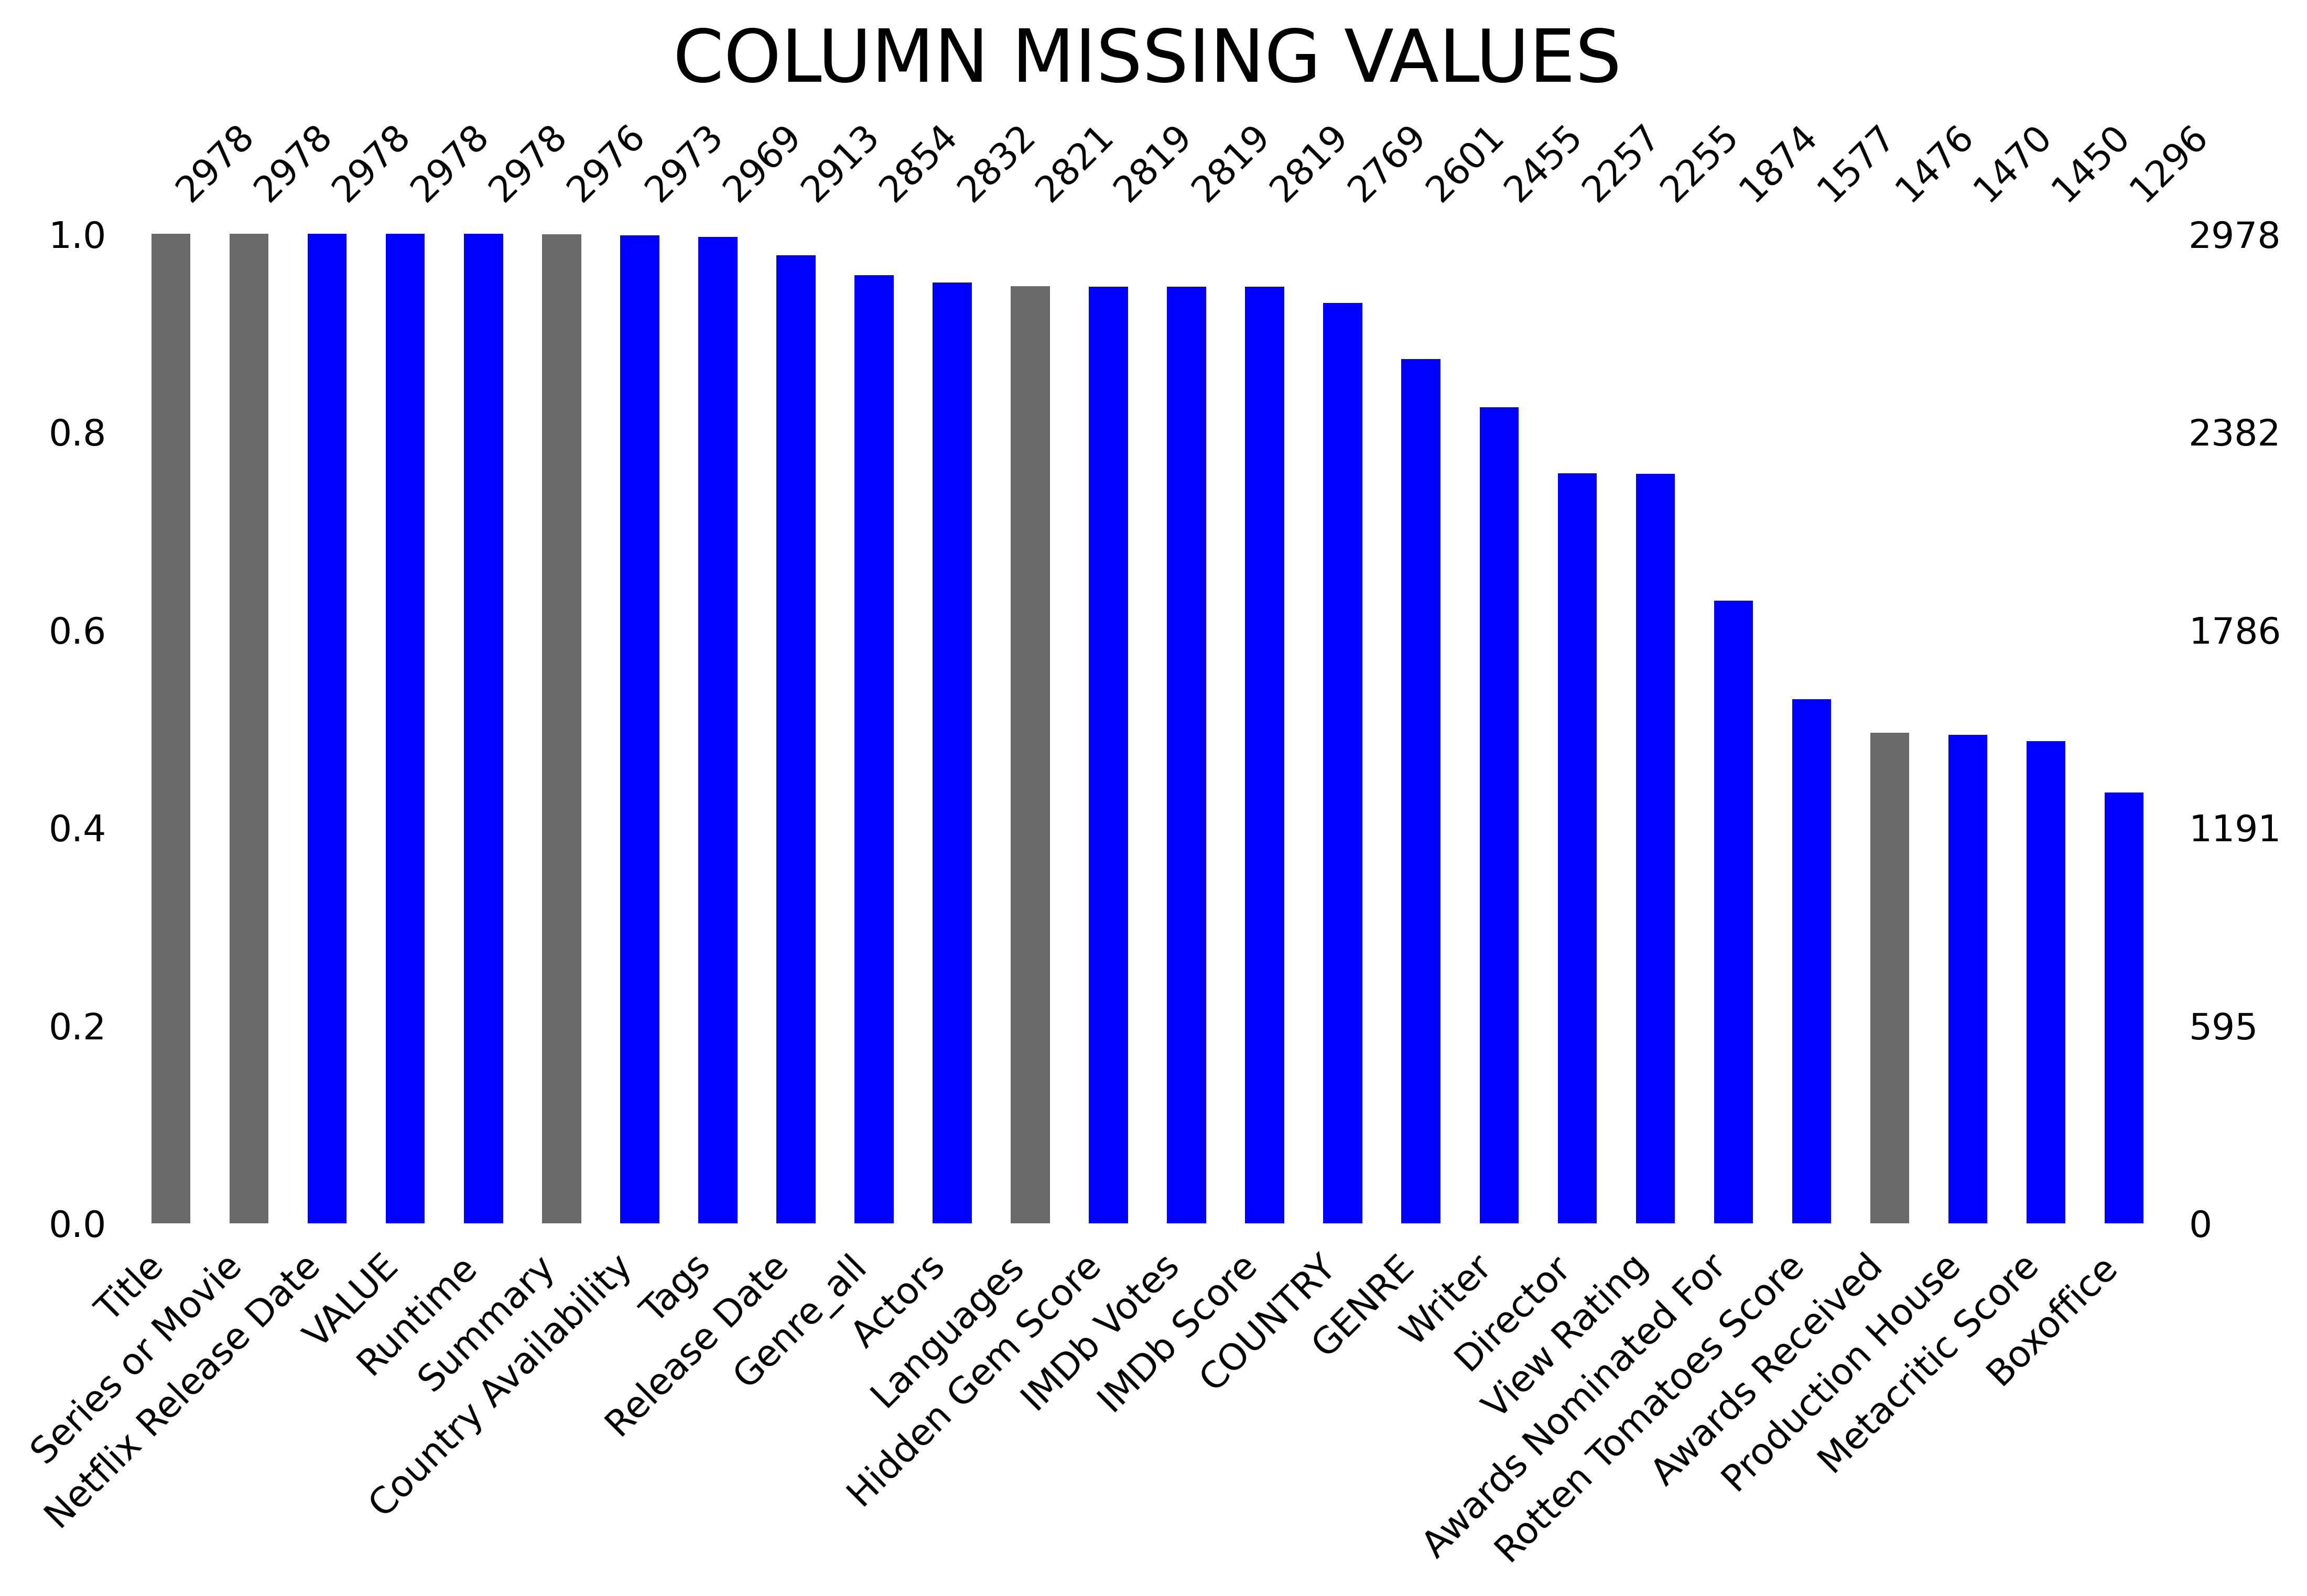

In [25]:
plt.figure(dpi=500)
color= ['dimgrey','dimgrey','blue','blue','blue','dimgrey','blue','blue','blue','blue','blue',
        'dimgrey','blue','blue','blue','blue','blue','blue','blue','blue','blue','blue','dimgrey',
        'blue','blue','blue']
missingno.bar(df_net,fontsize=10,color=color,figsize=(10,5), sort='descending')
plt.title('COLUMN MISSING VALUES',fontsize=20, pad=10)

plt.show()


## 인코딩

viewpoint 예측에 사용될 변수들을 일단은 타입, 생산 국가, 상영 국가와 장르, 태그, 출시 일, 런타임, 연령, imdb 투표수와 점수, 로튼토마토의 숨겨진 명작 점수들을 가지고 먼저 예측초기모델을 만들어보자

null값 처리

In [9]:
df = df_net[['Series or Movie', 'COUNTRY', 'Country Availability', 'Hidden Gem Score',
             'Release Date', 'GENRE','Tags',
             'View Rating', 'Runtime','VALUE','IMDb Score', 'IMDb Votes']]

In [10]:
df.isnull().sum()

Series or Movie           0
COUNTRY                 209
Country Availability      5
Hidden Gem Score        159
Release Date             65
GENRE                   377
Tags                      9
View Rating             723
Runtime                   0
VALUE                     0
IMDb Score              159
IMDb Votes              159
dtype: int64

In [11]:
df['Release Date'] = df['Release Date'].fillna(0)  # 날짜 데이터는 null값을 0으로 채움

In [12]:
df["Release Date"] = pd.to_datetime(df['Release Date'])
df['month'] = df['Release Date'].dt.month
df = df.drop(columns = ['Release Date'],axis =1)

In [13]:
df['Series or Movie'] = df['Series or Movie'].replace({'Movie': 1, 'TV': 2})  # type은 1,2로 인코딩

In [14]:
df['Series or Movie'].value_counts() # 영화 데이터가 4배정도 많은 걸로 나타남

1    2293
2     685
Name: Series or Movie, dtype: int64

In [15]:
df['COUNTRY'] = df['COUNTRY'].fillna('NA')  # 국가의 널값은 NA로 대체

In [16]:
df['GENRE'] = df['GENRE'].fillna('NA') # 장르의 널값도 NA로 대체

In [17]:
rows = len(df['Tags'])  # 태그는 태그 수를 사용
df['Tag_count'] = 0
for i in range(rows):
    df.Tag_count[i] = len(str(df.Tags.iloc[i]).split(','))
df = df.drop(['Tags'], axis = 1)

In [18]:
rows = len(df['Country Availability'])  # 상영국가는 상영국가 수를 사용
df['C_count'] = 0
for i in range(rows):
    df.C_count[i] = len(str(df['Country Availability'].iloc[i]).split(','))
df = df.drop(['Country Availability'], axis = 1)

In [19]:
for i in range(rows):
    if df['View Rating'][i] in ['PG', 'TV-PG', 'TV-G', 'TV-Y7', 'TV-Y', 'G', 'Unrated', 'TV-Y7-FV', 'Approved']:
        df['View Rating'][i] = 1  # 어린이 컨텐츠 = 1
    elif df['View Rating'][i] in ['PG-13', 'TV-14', 'R', 'GP', 'Passed', 'X']:
        df['View Rating'][i] = 2  # 청소년 컨텐츠 = 2
    elif df['View Rating'][i] in ['TV-MA', 'Not Rated','NC-17']:
        df['View Rating'][i] = 3  # 성인컨텐츠 = 3
    else:
        df['View Rating'][i] = 0 # null값을 0으로 처리


In [20]:
df['View Rating'] = df['View Rating'].astype(int)

In [21]:
df['Runtime'] = df['Runtime'].replace({'< 30 minutes' : 0,
                                             '30-60 mins' : 1,
                                             '1-2 hour' : 2,
                                             '> 2 hrs' : 3 })

In [22]:
df['Runtime'] = df['Runtime'].astype(int)

In [23]:
df['Runtime'].value_counts()

2    1716
0     740
3     506
1      16
Name: Runtime, dtype: int64

In [24]:
df.isnull().sum()

Series or Movie       0
COUNTRY               0
Hidden Gem Score    159
GENRE                 0
View Rating           0
Runtime               0
VALUE                 0
IMDb Score          159
IMDb Votes          159
month                 0
Tag_count             0
C_count               0
dtype: int64

In [25]:
df = df.dropna(how='any',axis=0)  # hidden gem score, imdb score, imdb vote의 null값이 같으므로 널값이 있는 행을 지움

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2819 entries, 0 to 2977
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series or Movie   2819 non-null   int64  
 1   COUNTRY           2819 non-null   object 
 2   Hidden Gem Score  2819 non-null   float64
 3   GENRE             2819 non-null   object 
 4   View Rating       2819 non-null   int64  
 5   Runtime           2819 non-null   int64  
 6   VALUE             2819 non-null   int64  
 7   IMDb Score        2819 non-null   float64
 8   IMDb Votes        2819 non-null   float64
 9   month             2819 non-null   int64  
 10  Tag_count         2819 non-null   int64  
 11  C_count           2819 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 286.3+ KB


### 장르와 제작국가는 원핫인코딩으로 인코딩

In [27]:
pd_df = pd.get_dummies(df[['COUNTRY','GENRE']])
df_result = pd.concat([df, pd_df], axis=1)

In [28]:
df_result = df_result.drop(['COUNTRY','GENRE'], axis = 1)

In [29]:
df_taget = df_result['VALUE']
df_result = df_result.drop(['VALUE'], axis = 1)

In [30]:
df_result.head(1)

,Series or Movie,Hidden Gem Score,View Rating,Runtime,IMDb Score,IMDb Votes,month,Tag_count,C_count,COUNTRY_Angola,...,GENRE_Mystery,GENRE_NA,GENRE_Reality-Show,GENRE_Romance,GENRE_Science Fiction,GENRE_Superhero,GENRE_Talk Show,GENRE_Thriller,GENRE_War,GENRE_Western
0,2,4.3,2,0,7.3,104495.0,10,4,36,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df_taget.head(1)

0    44867
Name: VALUE, dtype: int64

## 딥러닝을 통해 모든 변수들을 넣고 예측

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
X = df_result.iloc[:].values
y = df_taget.iloc[:].values

In [34]:
y = y.reshape(-1,1)

In [35]:
y

array([[44867],
       [42149],
       [27138],
       ...,
       [    1],
       [    1],
       [    1]])

In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X)
y_train = sc.fit_transform(y)

In [37]:
from keras import models
from keras import layers

ModuleNotFoundError: No module named 'keras'

In [ ]:
from keras.layers.core import Dropout
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(150, activation='relu',
                           input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(280, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(99, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(24, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [ ]:
X_train.shape

In [ ]:
import numpy as np

k = 4
all_mae_histories = []

num_val_samples = len(X_train) // k
num_epochs = 300
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]  # 검증 데이터 준비: k번째 분할
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(  # 훈련 데이터 준비: 다른 분할 전체
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

model = build_model()  # 케라스 모델 구성(컴파일 포함)
history = model.fit(partial_train_data, partial_train_targets,  # 모델 훈련(verbose=0이므로 훈련 과정이 출력되지 않습니다.)
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=True)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)  # 검증 세트로 모델 평가
all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

**에포크 300으로 딥러닝을 진행했을 때 오차가 0.227, 227정도로 viewpoint가 1~40000인것을 감안하면 오차가 좀 큰걸로 나옴**
- all_scores = [0.2270810753107071]

In [ ]:
num_epochs = 150
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]  #검증 데이터 준비: k번째 분할    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(  # 훈련 데이터 준비: 다른 분할 전체
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
         y_train[(i + 1) * num_val_samples:]],
        axis=0)

model = build_model()  # 케라스 모델 구성(컴파일 포함)
history = model.fit(partial_train_data, partial_train_targets,  # 모델 훈련(verbose=0이므로 훈련 과정이 출력되지 않습니다.)
                    validation_data=(val_data, val_targets),
                    epochs=num_epochs, batch_size=1, verbose=True)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

In [ ]:
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

에포크 90정도 지점부터 오차가 줄어들지 않는것으로 보인다. 이 지점이 과대적합 지점이라고 생각하고 새로운 모델을 만들어서 테스트 해보았다.

In [ ]:
model = build_model()  # 새롭게 컴파일된 모델을 얻습니다.
model.fit(X_train, y_train,  # 전체 데이터로 훈련시킵니다.
          epochs=90, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_train, y_train)

In [ ]:
# batch_size = 1
# test_mse_score, test_mae_score = model.evaluate(X_train, y_train)
# 89/89 [==============================] - 0s 2ms/step - loss: 1.0165 - mae: 0.3206
# test_mae_score = 0.3206084668636322

In [ ]:
test_mae_score

##### 최종 결과
- batch_size = 16 , epochs = 90

- 89/89 [==============================] - 0s 2ms/step - loss: 0.2012 - mae: 0.1685
- test_mae_score = 0.1685454249382019

- 최종 결과 epochs 90지점에서 오차가 0.169정도로 나왔고, 최종 오차는 169정도 나는걸로 보인다.

- 데이터셋이 부족하여 오차를 더 줄이기는 어려워 보인다.
- 추후에 데이터셋을 더 추가하고, 딥러닝 코드를 손을 보면 더 좋은 예측모델이 나올것으로 보인다.

In [ ]:
# pd_df = pd.get_dummies(df_net['Tags'])
# df_result = pd.concat([df_net, pd_df], axis=1)